# Detecting Fake News
this project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Let's us start by reading our data file using pandas's dataframe:

Our data contain 3 essential columns: Title, text and label. The Label column can contain one of the two values either FAKE or REAL 

In [3]:
data = pd.read_csv('news.csv')
data.shape
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
#not necessary step in our case because our data are not numerique data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6335.0,5280.415627,3038.503953,2.0,2674.5,5271.0,7901.0,10557.0


In [6]:
#knowing more about our set of data
data.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell

In [7]:
# possible values for the column label
data['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [8]:
#check if we have any Nan value in our entir dataframe
data.isnull().values.any()

False

In [9]:
#check if we have any empty value in our entir dataframe
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Great !, So our Data doesn't contain any Nan value, and no empty string too

### Lets us view the frequency of the label values: FAKE vs REAL

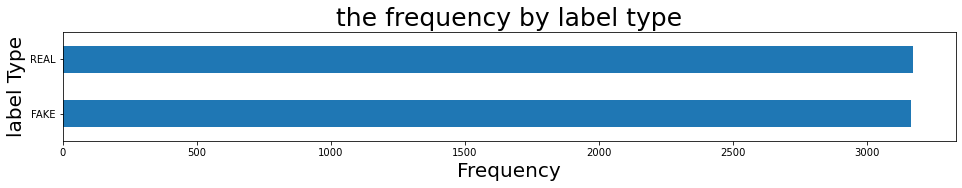

In [10]:
# frequency of each label value:
plt.figure(figsize=(16,2))
data.groupby('label')['label'].count().plot(kind='barh')
plt.title('the frequency by label type', fontsize=25)
plt.ylabel('label Type', fontsize=20)
plt.xlabel('Frequency', fontsize=20)
plt.show()

### Since our research question is to predict the label type of a given text, so now we will need to reccuperate the label column fro the dataset

In [11]:
label = data['label']
label.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Now let's split our data  into train & test data

In [12]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], label, test_size=0.2, random_state=7)

### Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7. A TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

In [13]:
#Initialize a TfidfVectorizer
tfidfV=TfidfVectorizer(stop_words = 'english' , max_df = 0.7)
#Fit and transform train set, transform test set
tfidf_train=tfidfV.fit_transform(x_train) 
tfidf_test=tfidfV.transform(x_test)

### Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

#### Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.


In [15]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


#### We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [16]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 42, 587]], dtype=int64)